# Data Visualisations

1. Importing libraries and dataset
2. Overviews of charts
        A. Bar
        B. Histogram
        C. Scatterplot
        D. Line
 

 3. Descriptive findings about the time of day purchases are made
 4. Distribution of loyalty flags
 5. Difference in expenditure depending on the hour of day
 6. Connection between age and number of dependants
 7. Connection between age and spending power (income)
 8. Exporting visualisations

In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [3]:
#create usable path 
path = r'C:\Users\rutha\CareerFoundry\01-23_Instacart_Basket_Analysis'

In [4]:
#import data set
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_all2.pkl'))

In [5]:
#checking output 
df.sample(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,dependants_loc,fam_status,income
13432733,3357744,85012,4,1,7,16.0,17902,8,1,both,...,13.0,Regular customer,Male,VT,50,2020-02-11,1,Has dependants,married,139092
14497473,2754265,91778,39,0,9,7.0,7413,7,0,both,...,8.0,Frequent customer,Female,ND,42,2019-06-18,1,Has dependants,married,130024
27722528,3126045,176179,4,2,16,4.0,29447,5,0,both,...,7.0,Frequent customer,Male,NJ,22,2017-08-22,1,Has dependants,married,84908
19771704,2528246,125361,33,5,18,5.0,-22414,11,1,both,...,5.0,Frequent customer,Female,AZ,27,2020-02-09,2,Has dependants,married,71815
23204103,1035191,147326,38,6,16,6.0,-31988,5,1,both,...,7.0,Frequent customer,Male,MO,71,2020-03-25,3,Has dependants,married,143261


# 1. Overviews of Charts

### A. Bar Chart

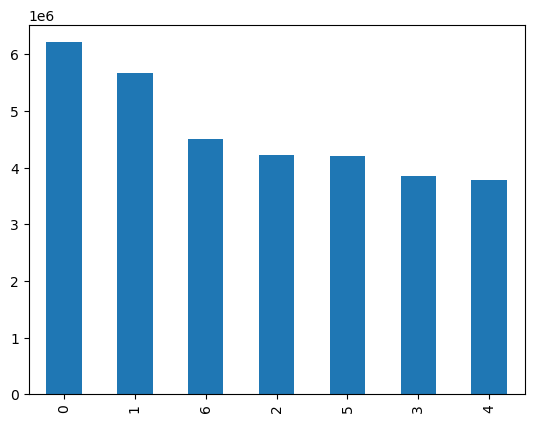

In [12]:
#creating a bar chart for order_day_of_week column
bar1 = df['orders_day_of_week'].value_counts().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

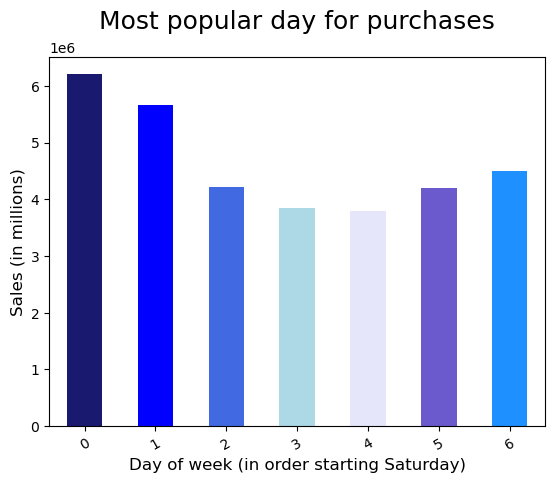

In [11]:
bar_order_day_of_week = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['midnightblue', 'blue', 'royalblue', 'lightblue', 'lavender', 'slateblue', 'dodgerblue'])
plt.title('Most popular day for purchases', fontsize = 18, pad=20)
plt.ylabel('Sales (in millions)', fontsize = 12)
plt.xlabel('Day of week (in order starting Saturday)',  fontsize = 12)
plt.xticks(rotation=30)

Saturday and Sunday are the most popular days across the week, and Tuesay and Wednesday are the least popular.

### B. Histogram

Text(0.5, 0, 'Price of item (in USD)')

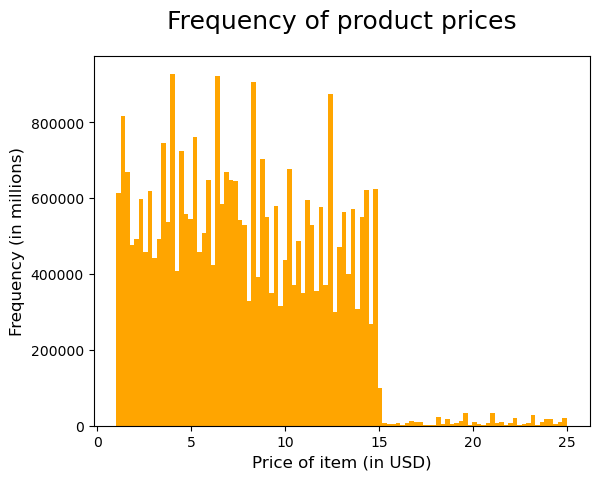

In [7]:
#creating a histogram for prices 
hist_prices = df['prices'].plot.hist(bins = 100, color = ['orange'])
plt.title('Frequency of product prices', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price of item (in USD)',  fontsize = 12)

This historgram shows that the majority of products are priced under $15, which aligns with the results of the product price flag we created earlier.

### C. Scatterplot

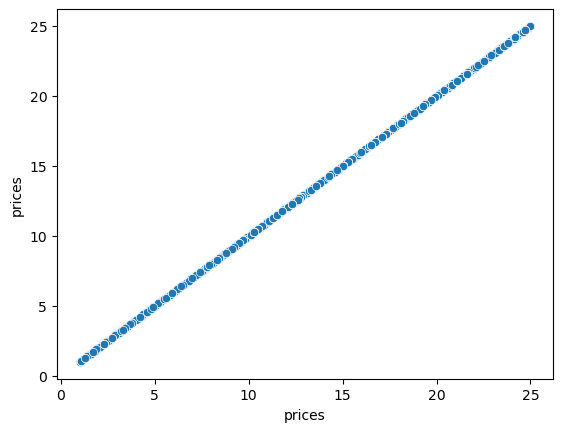

In [20]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df)

This chart is not useful for our analysis. 

# Creating a Sample

Due to memory constraints, we will need to create a subset which is representative of my entire dataset when exploring line charts. 

In [15]:
#assining each row in my dataset a random value between 0 and 1, then creating a logical test to check each number against a value of 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

Now we divide all of our rows into one of two samples

In [17]:
#assigning 70% of the sample in df_big
big = df[dev]

In [18]:
#assigning 30% of the sample in df_small
small = df[~dev]

In [19]:
len(df)

32435059

In [20]:
#checking output by comparing the shap of each sample to the whoe
len(big) + len(small)

32435059

In [21]:
df_small = small[['orders_day_of_week','prices']]

### D. Line Chart

Text(0.5, 0, 'Day of week (in order starting Saturday)')

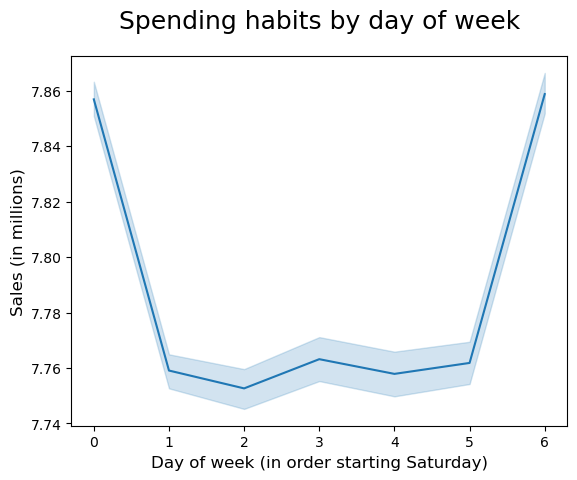

In [23]:
#create your line chart
line_order_day_of_week = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')
plt.title('Spending habits by day of week', fontsize = 18, pad=20)
plt.ylabel('Sales (in millions)', fontsize = 12)
plt.xlabel('Day of week (in order starting Saturday)',  fontsize = 12)

# 3. Look at hour the time of day impacts purchases

Provide the Instacart senior stakeholders with descriptive findings about sales. Create a hisotgram of the "order_hour_of_day" column. In a markdown cell beneath your histogram, describe what the histogram demonstrates

Text(0.5, 0, 'Time of day (24 hour clock)')

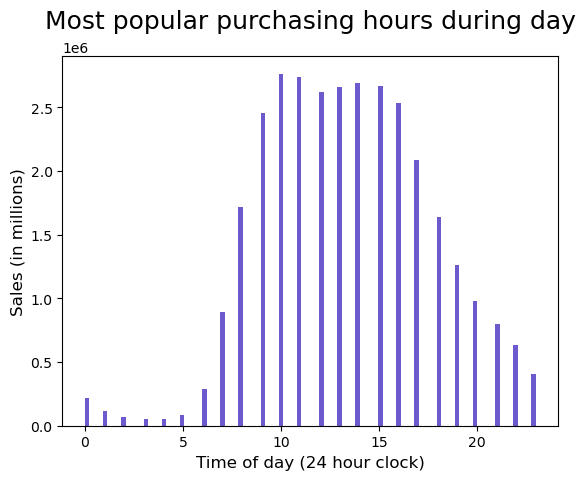

In [13]:
#creating a histogram for order
hist_ords_hour = df['order_hour_of_day'].plot.hist(bins = 100, color = ['slateblue'])
plt.title('Most popular purchasing hours during day', fontsize = 18, pad=20)
plt.ylabel('Sales (in millions)', fontsize = 12)
plt.xlabel('Time of day (24 hour clock)',  fontsize = 12)

This histogram shows the distribution of purchases made during the day, by hour. You can see that the most popular times to purchase are between 9am 5pm. 

# 4. Look at the impact of loyalty status on purchases 

The Marketing team is curious about the distribution of orders among customers in terms of loyalty. We need to create a bar chart from the "loyalty_flag" columns

In [19]:
#checking max orders
df['max_order'].value_counts(ascending = True)

96      40469
98      44604
97      44969
90      48399
93      50440
       ...   
7      804745
9      810842
6      812072
8      812631
99    1172313
Name: max_order, Length: 97, dtype: int64

Text(0.5, 0, 'No. of orders')

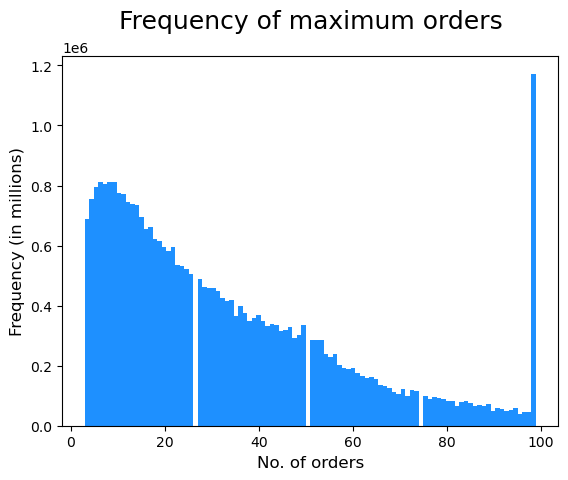

In [21]:
#creating a histogram for max order 
hist_freq_max_order = df['max_order'].plot.hist(bins = 100, color = ['dodgerblue'])
plt.title('Frequency of maximum orders', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('No. of orders',  fontsize = 12)

In [16]:
#checking numbers within loyalty_flag column
df['loyalty_flag'].value_counts()

Regular customer    15891507
Loyal customer      10294027
New customer         6249525
Name: loyalty_flag, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

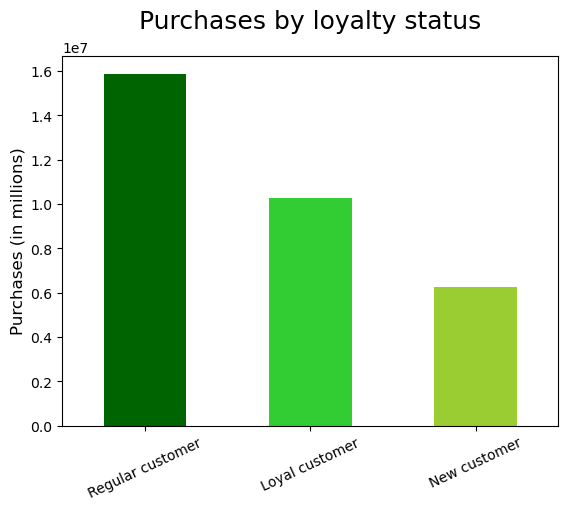

In [14]:
#creating a bar chart for order_day_of_week column
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'yellowgreen'])
plt.title('Purchases by loyalty status', fontsize = 18, pad=20)
plt.ylabel('Purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

# 5. Look at prices by hour of day

Check whether there's a difference in expenditure (the "prices" column) depending on the hour of day. To check this, you need to use an accurate sample for your line chart

In [42]:
#first we need to create a subset dataframe 
df_ohod = small[['order_hour_of_day','prices']]

In [43]:
#checking output 
df_ohod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729960 entries, 0 to 32435045
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int8   
 1   prices             float64
dtypes: float64(1), int8(1)
memory usage: 415.7 MB


In [44]:
df_ohod.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


([<matplotlib.axis.XTick at 0x1c93f73cc70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

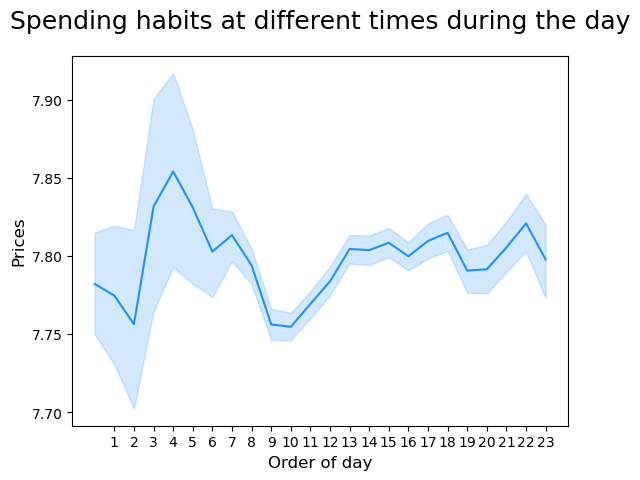

In [49]:
#creating a line chart of hour and prices
line_hour_of_day = sns.lineplot(data = df_ohod, x = 'order_hour_of_day', y = 'prices', color = 'dodgerblue')
plt.title('Spending habits at different times during the day', fontsize = 18, pad=20)
plt.ylabel('Prices', fontsize = 12)
plt.xlabel('Order of day',  fontsize = 12)
plt.xticks(range(1, 24))

There is a slight peak in prices around 4-5am, and lows at 2am and 9-10am. That being said, the price doesn't fluctuate that much throughout the day. 

# 5. Investigate the relationship between age and family situation

Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependants. In a markdown cell beneath your line chart, describe what the line chart chows

In [42]:
#creating a subset for the line chart
df_age_dependants = small[['age','n_dependants']]

In [43]:
#checking output 
df_age_dependants.sample(5)

,age,n_dependants
27853397,38,0
6888994,70,1
25964708,21,3
9353444,24,1
24758359,34,1


In [44]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729960 entries, 0 to 32435045
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   age           int8 
 1   n_dependants  int16
dtypes: int16(1), int8(1)
memory usage: 360.1 MB


In [45]:
df_EXage_dependants.describe()

,age,n_dependants
count,9.729960e+06,9.729960e+06
mean,4.947082e+01,1.502119e+00
std,1.848223e+01,1.118851e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


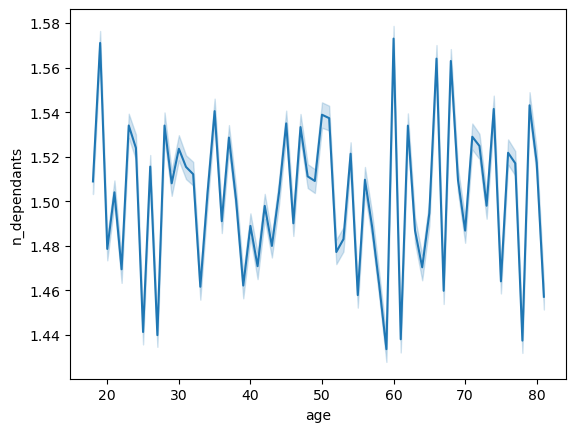

In [47]:
#creating line chart 
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'n_dependants')

The chart shows age vs number of dependants. The results are inconclusive. 

# 6. Explore whether there's a connection between age and spending power (income). To visualise this relationship, create a scatterplot using the sns.scatterplot() function

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [50]:
#creating a dataframe for my scatterplot
df_age_income = small[['age','income']]

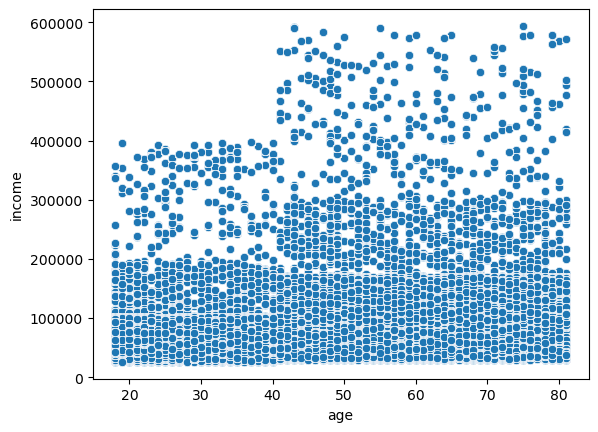

In [51]:
#creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

The scatterplot shows the relationship between age (x-axis) and income (y-axis). We can see positive correlation between age and income in that the older you get, the higher your income. I do think the big step up at age 40 is interesting, I would have expected to see a more consistent and gradual increase and I do think it's strange that no one under the age of 40 earns more than 400,000.

For the purpose of this analysis however, Instacart would be able to target those over 40 as those with "spending power".

# 7. Exporting Visualisations 

In [33]:
bar_order_day_of_week.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_order_dow24.02.png'))

In [6]:
hist_prices.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_prices24.02.png'))

In [56]:
scatterplot_prices.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'scatter_prices24.02.png'))

In [24]:
line_order_day_of_week.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line_dow24.02.png'))

In [36]:
hist_ords_hour.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_hour_day24.02.png'))

In [15]:
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_loyalty24.02.png'))

In [50]:
line_hour_of_day.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line_hour_day24.02.png'))

In [61]:
line_age_dependants.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line_age_dependants24.02.png'))

In [62]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'scatter_age_income24.02.png'))

In [40]:
line_order_day_of_week.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line_order_day_of_week.07.png'))

In [23]:
hist_freq_max_order.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_freq_max_order.07.png'))